In [1]:
import numpy as np
import json
import os
from poisson import poisson
import matplotlib.pyplot as plt

In [2]:
with open('../cfd-rs/meshes/small_structured.json') as f:
    mesh = json.load(f)
    
cells_centers = np.array(mesh['cells']['centers'][:])
pairs_centers = np.array(mesh['pairs']['centers'][:])
n_cells = mesh['cells']['n']
n_pairs = mesh['pairs']['n']

In [3]:
for key in mesh.keys():
    print(key, mesh[key].keys())

core dict_keys(['cells', 'boundaries', 'faces', 'vertices'])
nodes dict_keys(['n', 'centers', 'volumes', 'areas', 'normals', 'neighboring_nodes', 'neighboring_cells', 'neighboring_pairs', 'cv_nodes'])
cells dict_keys(['n', 'centers', 'volumes', 'areas', 'normals', 'neighboring_nodes', 'neighboring_cells', 'neighboring_patches', 'neighboring_pairs'])
pairs dict_keys(['n', 'centers', 'lengths', 'nodes', 'vectors', 'neighboring_cells', 'cells_normals', 'cells_areas', 'nodes_normals', 'nodes_areas', 'on_bnd'])
boundaries dict_keys(['n', 'names', 'faces', 'nodes', 'cells'])


In [4]:
mesh['pairs']['neighboring_cells'][0][0]['Cell']
mesh['cells']['centers']
mesh['cells']['centers'][:][0]
print(cells_centers[:, 0])
cells_centers[:, 1]

[0.125 0.375 0.625 0.875 0.125 0.375 0.625 0.875 0.125 0.375 0.625 0.875
 0.125 0.375 0.625 0.875]


array([0.125, 0.125, 0.125, 0.125, 0.375, 0.375, 0.375, 0.375, 0.625,
       0.625, 0.625, 0.625, 0.875, 0.875, 0.875, 0.875])

In [5]:

boundaries=[]
phi, phi_edges, grad_x, grad_y = poisson(mesh, boundaries)

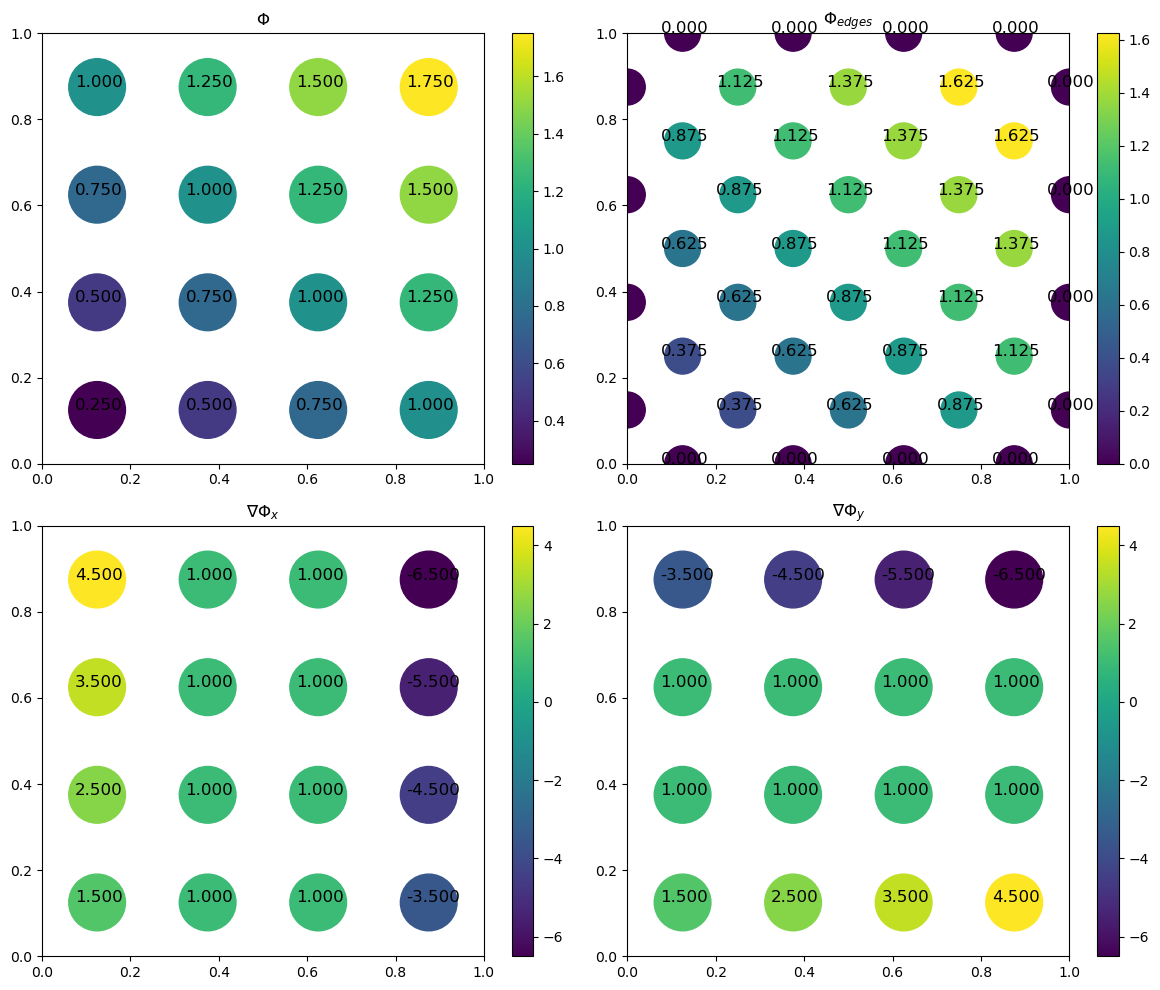

In [6]:
fig = plt.figure(figsize=(12, 10))

ax = fig.add_subplot(2, 2, 1)
x = cells_centers[:, 0]
y = cells_centers[:, 1]
values = phi
n = n_cells
cm = ax.scatter(x, y, c=values, cmap='viridis', s=1./float(n_cells-1)*25000.)
ax.set_title(r'$\Phi$')
ax.set_xlim((0., 1.))
ax.set_ylim((0., 1.))
fig.colorbar(cm, ax=ax)
for i in range(n):
    ax.annotate('{:.3f}'.format(values[i]), (x[i]-0.05, y[i]), fontsize=12)

ax = fig.add_subplot(2, 2, 2)
x = pairs_centers[:, 0]
y = pairs_centers[:, 1]
values = phi_edges
n = n_pairs
cm = ax.scatter(x, y, c=values, cmap='viridis', s=1./float(n_cells-1)*10000.)
ax.set_title(r'$\Phi_{edges}$')
ax.set_xlim((0., 1.))
ax.set_ylim((0., 1.))
fig.colorbar(cm, ax=ax)
for i in range(n):
    ax.annotate('{:.3f}'.format(values[i]), (x[i]-0.05, y[i]), fontsize=12)

ax = fig.add_subplot(2, 2, 3)
x = cells_centers[:, 0]
y = cells_centers[:, 1]
values = grad_x
n = n_cells
cm = ax.scatter(x, y, c=values, cmap='viridis', s=1./float(n_cells-1)*25000.)
ax.set_title(r'$\nabla \Phi_x$')
ax.set_xlim((0., 1.))
ax.set_ylim((0., 1.))
fig.colorbar(cm, ax=ax)
for i in range(n):
    ax.annotate('{:.3f}'.format(values[i]), (x[i]-0.05, y[i]), fontsize=12)

ax = fig.add_subplot(2, 2, 4)
x = cells_centers[:, 0]
y = cells_centers[:, 1]
values = grad_y
n = n_cells
cm = ax.scatter(x, y, c=values, cmap='viridis', s=1./float(n_cells-1)*25000.)
ax.set_title(r'$\nabla \Phi_y$')
ax.set_xlim((0., 1.))
ax.set_ylim((0., 1.))
fig.colorbar(cm, ax=ax)
for i in range(n):
    ax.annotate('{:.3f}'.format(values[i]), (x[i]-0.05, y[i]), fontsize=12)

fig.tight_layout()